In [1]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.pipelines.controlnet.pipeline_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

import os

In [2]:
# load controlnet and stable diffusion v1-5-inpainting
base_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-seg",
    torch_dtype=torch.float16
)

controlnet = ControlNetModel.from_pretrained(
    "models/controlnet-seg-finetuned",
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetInpaintPipeline.from_single_file(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    # "SG161222/Realistic_Vision_V3.0_VAE",
    # "runwayml/stable-diffusion-inpainting",
    # "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

base_pipe = StableDiffusionControlNetInpaintPipeline.from_single_file(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    # "SG161222/Realistic_Vision_V3.0_VAE",
    # "runwayml/stable-diffusion-inpainting",
    # "runwayml/stable-diffusion-v1-5",
    controlnet=base_controlnet,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")
base_pipe = base_pipe.to("cuda")

C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that 

In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [4]:
text_prompt = "high quality detailed photograph of a woman standing"
negative_prompt = "poor quality, bad, worst, unnatural, patched, cropped, flat, unrealistic, fade, Disfigured, cartoon, blurry, nude"

In [17]:
new_size = (512, 512)
n = 5

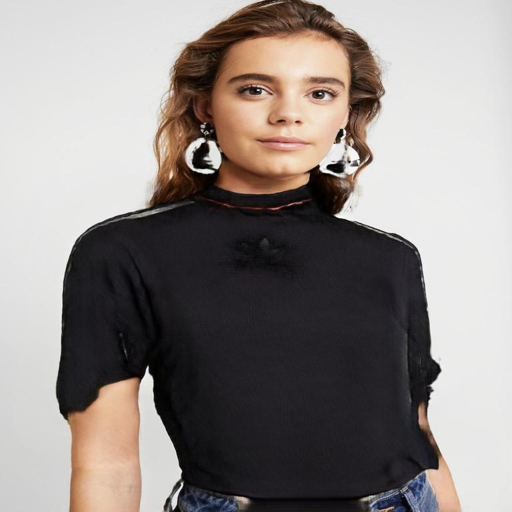

In [18]:
image = load_image(f"C:/Users/tabatabaei/Desktop/segment test data/distorted/{n}.jpg").resize(new_size)
image

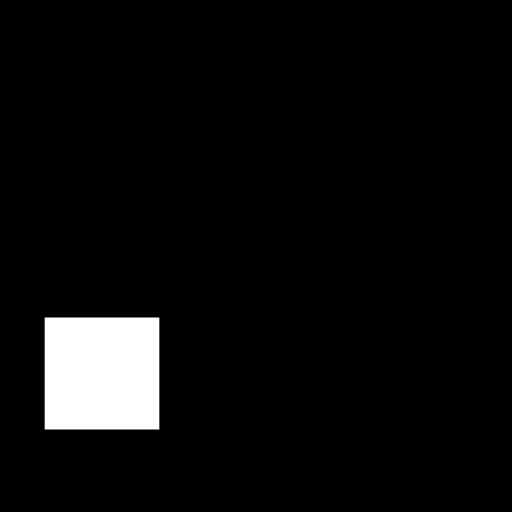

In [19]:
mask_image = load_image(f"C:/Users/tabatabaei/Desktop/segment test data/mask/{n}.jpg").resize(new_size)
mask_image

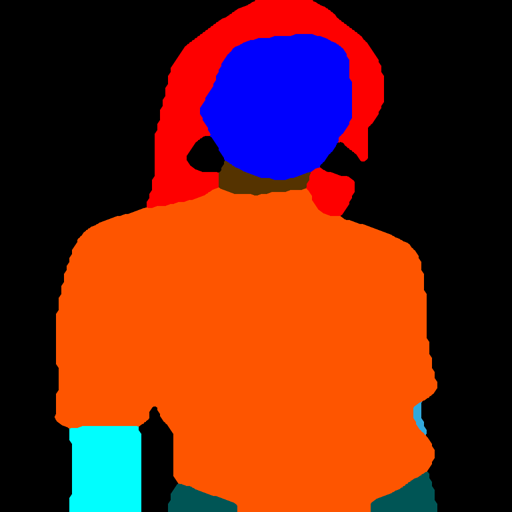

In [20]:
seg_image = load_image(f"C:/Users/tabatabaei/Desktop/segment test data/segment/{n}.png").resize(new_size)
seg_image

In [21]:
generator = torch.manual_seed(5)

results = []
for scale in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:

    generated_image = pipe(
        text_prompt,
        image=image,
        mask_image=mask_image,
        control_image=seg_image,
        num_inference_steps=20,
        generator=generator,
        controlnet_conditioning_scale = scale,
        width=384, height=512
    ).images[0]

    results.append(generated_image)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

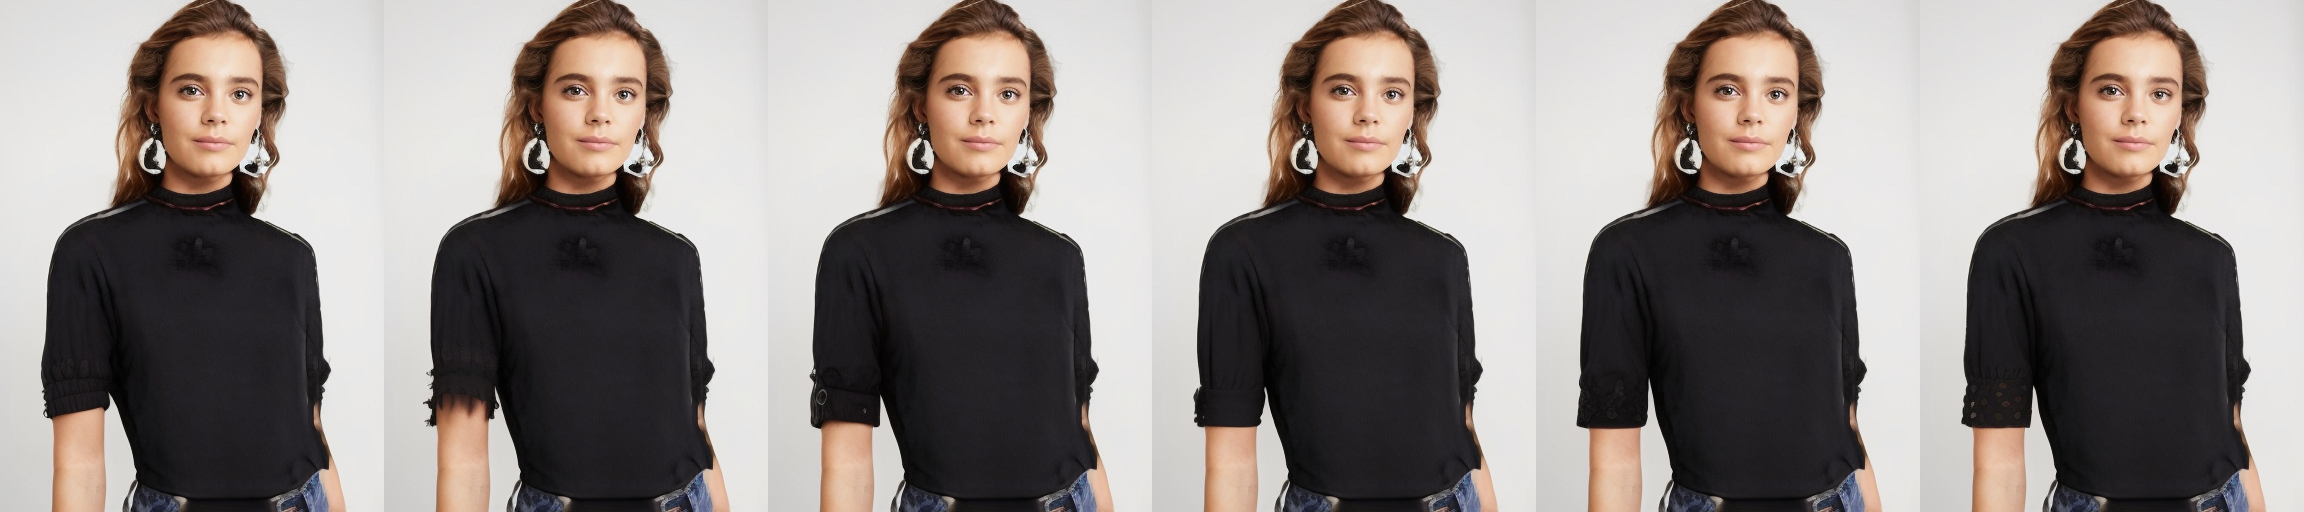

In [22]:
grid = image_grid(results,  1, 6)
grid

  0%|          | 0/20 [00:00<?, ?it/s]

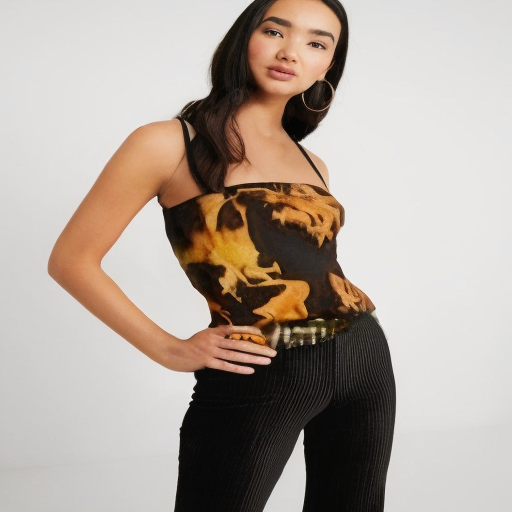

In [35]:
# generator = torch.manual_seed(18)

generated_image = pipe(
    text_prompt,
    image=image,
    mask_image=mask_image,
    control_image=seg_image,
    num_inference_steps=20,
    # generator=generator,
    controlnet_conditioning_scale = 1.0,
).images[0]

generated_image

  0%|          | 0/20 [00:00<?, ?it/s]

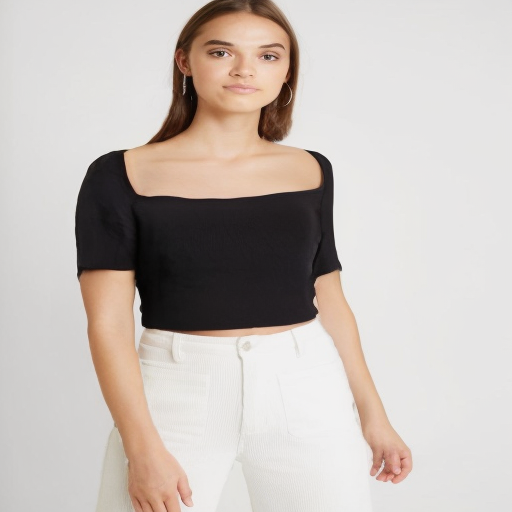

In [52]:
# generator = torch.manual_seed(13)

generated_image = base_pipe(
    text_prompt,
    image=image,
    mask_image=mask_image,
    control_image=seg_image,
    num_inference_steps=20,
    # generator=generator,
    controlnet_conditioning_scale = 1.0,
).images[0]

generated_image